# Saliency Detection
In essence, saliency is what “stands out” in a photo or scene, enabling your eye-brain connection to quickly (and essentially unconsciously) focus on the most important regions.

For example consider the figure on the light house. When looking at the photo, your eyes automatically focus on the lighthous as it is the most important area of the photo. This automatic process of locating the important parts of an image or scene is called saliency detection.
<div class="row">
    <div class="column">
        <img src="saliency_detection/images/original.png">
    </div>
    <div class="column">
        <img src="saliency_detection/images/saliency_heatmap.jpg">
    </div>
</div>
<caption><center> <u> <font color='purple'> Figure 1: Sliency heatmap [2]</font></u></center></caption>

Saliency detection is applied to many aspects of computer vision and image processing, but some of the more popular applications of saliency include:
- Object detection  Instead of exhaustively applying a sliding window and image pyramid, only apply our (computationally expensive) detection algorithm to the most salient, interesting regions of an image most likely to contain an object
- Advertising and marketing  Design logos and ads that “pop” and “stand out” to us from a quick glance
- Robotics  Design robots with visual systems that are similar to our own

Generaly applications can be categorized into three groups [2]:

1- The first category of applications directly takes advantage of the detection of surprising, thus abnormal areas in the signal. We can call this class of applications “Abnormality detection”. Surveillance or events/defects detection are examples of applications domains in this category.

2- The second category will focus more on the opposite of the first one: as the attention maps provide us with an idea about the surprising parts of the signal, one can deduce where the normal (homogenous, repetitive, usual, etc…) signal is. We will call this category “Normality modeling”. The main application domains are in signal compression or re-targeting.

3- Finally, the third application category is related to the surprising parts of the signal but will go further than a simple detection. This application family will be called “Abnormality processing” and it will need to compare and further process the most salient regions. Domains such as robotics, object retrieval or interfaces optimization can be found in this category.

Saliency detectors are often very fast algorithms capable of running in real-time. The results of the saliency detector are then passed into more computationally expensive algorithms that you would not want to run on every single pixel of the input image.

## OpenCV Saliency Detection
1- Static saliency: This class of saliency detection algorithms relies on image features and statistics to localize the most interesting regions of an image.

2- Motion saliency: Algorithms in this class typically rely on video or frame-by-frame inputs. The motion saliency algorithms process the frames, keeping track of objects that “move”. Objects that move are considered salient.

3- Objectness: Saliency detection algorithms that compute “objectness” generate a set of “proposals”, or more simply bounding boxes of where it thinks an object may lie in an image.

You can check if the `saliency` module is installed by trying to import it [2]:

In [2]:
# make sure that jupyter sees OpenCV
import os, sys
sys.path.append("/home/meshgi-k/anaconda3/envs/opencv/lib/python3.6/site-packages/cv2")
import cv2
cv2.saliency

<module 'cv2.saliency'>

### Satatic Saliency
OpenCV implements two algorithms for static saliency detection.

1- The first method is from Montabone and Soto’s 2010 publication, <a href="https://www.sciencedirect.com/science/article/pii/S0262885609001371">Human detection using a mobile platform and novel features derived from a visual saliency mechanism</a>. This algorithm was initially used for detecting humans in images and video streams but can also be generalized to other forms of saliency as well.

2- The second method is by Hou and Zhang in their 2007 CVPR paper, <a href="http://bcmi.sjtu.edu.cn/~zhangliqing/Papers/2007CVPR_Houxiaodi_04270292.pdf">Saliency detection: A spectral residual approach.</a>
This static saliency detector operates on the log-spectrum of an image, computes saliency residuals in this spectrum, and then maps the corresponding salient locations back to the spatial domain.

In [37]:
import cv2

def saliency_detection (image, method):
    """
    Detects saliency map of an still image
    
    Arguments:
    image -- Input image
    method -- saliency detection method: Specteral Residual, Fine Grained
    
    Output:
    success -- if saliency map is generated
    saliency_map -- a [0,1] map of saliency
    thereshold_map -- a binary map of saliency/background
    threshold -- saliency map threshold for making binary mask
    """
    success = False
    saliency_map = None
    threshold = -1
    threshold_map = None

    if method == 'Specteral Residual':
        # initialize OpenCV's static saliency spectral residual detector and
        # compute the saliency map
        saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
        (success, saliency_map) = saliency.computeSaliency(image)

    elif method == 'Fine Grained':
        # initialize OpenCV's static fine grained saliency detector and
        # compute the saliency map
        saliency = cv2.saliency.StaticSaliencyFineGrained_create()
        (success, saliency_map) = saliency.computeSaliency(image)

        # if we would like a *binary* map that we could process for contours,
        # compute convex hull's, extract bounding boxes, etc., we can
        # additionally threshold the saliency map
        thresh_map = cv2.threshold(saliency_map, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        threshold = thresh_map[0]
        threshold_map = thresh_map[1]

    return success, saliency_map, threshold_map, threshold

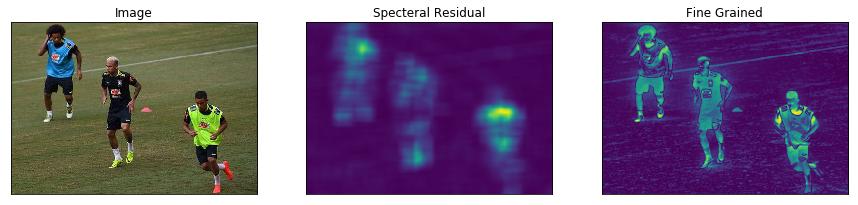

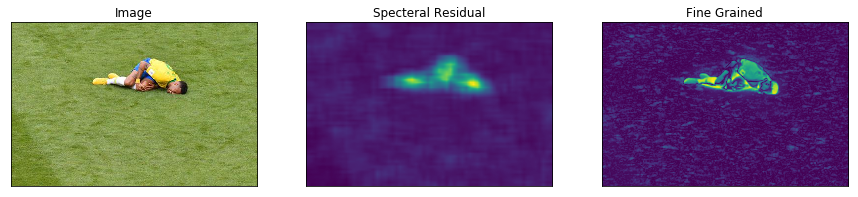

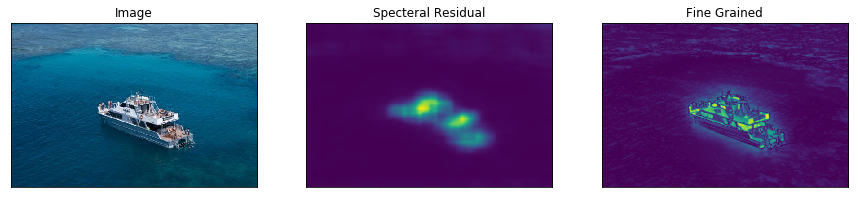

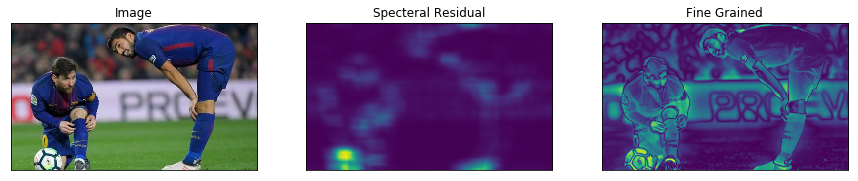

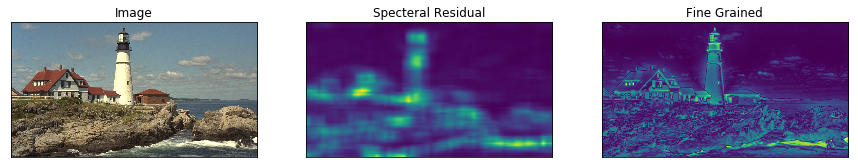

Threshold: 55.0


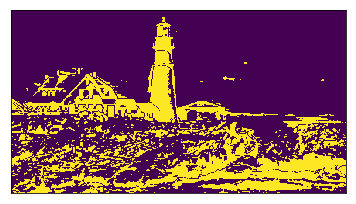

In [35]:
# Unit test for saliency_detection
from matplotlib import pyplot as plt

def show_saliency_map (img, sal1, sal2):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 7))
    subplot = plt.subplot(1, 3, 1)
    subplot.imshow(img)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('Image')
    subplot = plt.subplot(1, 3, 2)
    subplot.imshow(sal1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('Specteral Residual')
    subplot = plt.subplot(1, 3, 3)
    subplot.imshow(sal2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('Fine Grained')
    plt.show()
    
# load the input image
imgs = ['players.jpg','neymar.jpg','boat.jpg','barcelona.jpg','original.png']
for img in imgs:
    image = cv2.imread('saliency_detection/images/'+img)
    success, saliency_map1, threshold_map, threshold = saliency_detection (image, 'Specteral Residual') #Specteral Residual, Fine Grained
    success, saliency_map2, threshold_map, threshold = saliency_detection (image, 'Fine Grained') #Specteral Residual, Fine Grained
    if (success):
        show_saliency_map (image, saliency_map1, saliency_map2)
    else:
        print ('Saliency Detection Failed.')

if threshold > -1:
    print("Threshold:", threshold)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(threshold_map)

### Objectness Saliency
`OpenCV` includes one objectness saliency detector <a href="https://mmcheng.net/bing/">BING: Binarized normed gradients for objectness estimation at 300fps</a>, by Cheng et al. (CVPR 2014).

Unlike the other saliency detectors in OpenCV which are entirely self-contained in their implementation, the BING saliency detector requires nine separate model files for various window sizes, color spaces, and mathematical operations.
The nine model files together are very small (~10KB) and extremely fast, making BING an excellent method for saliency detection.

In [39]:
import cv2
import numpy as np

def objectness_detection (image, method='BING', max_detections = 5):
    """
    Detects saliency map of an still image
    
    Arguments:
    image -- Input image
    method -- Objectness detection method: BING
    max_detections -- Maximum number of candidates
    
    Output:
    bboxes -- object candidates
    """
    bboxes = []
        
    if method =='BING':
        # initialize OpenCV's objectness saliency detector and set the path
        # to the input model files
        saliency = cv2.saliency.ObjectnessBING_create()
        saliency.setTrainingPath('saliency_detection/model/bing')

        # compute the bounding box predictions used to indicate saliency
        (success, saliency_map) = saliency.computeSaliency(image)
        num_detections = saliency_map.shape[0]

        # loop over the detections
        for i in range(0, min(num_detections, max_detections)):
            # extract the bounding box coordinates
            (startX, startY, endX, endY) = saliency_map[i].flatten()

            bboxes.append([startX, startY, endX, endY])

    return bboxes

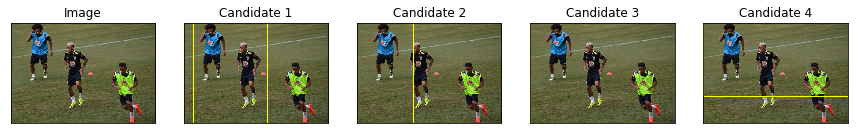

In [85]:
#unit test for objectness detection
from matplotlib import pyplot as plt

def show_objectness_map (img, bboxes , colors):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    n = len(bboxes)
    plt.figure(figsize=(15, 7))
    
    subplot = plt.subplot(1, n+1, 1)
    subplot.imshow(img)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('Image')

    for (i,B) in enumerate(bboxes):
        
        (startX, startY, endX, endY) = B
        
        output = img.copy()
        cv2.rectangle(output, (startX, startY), (endX, endY), (255,255,0), 2)
        
        subplot = plt.subplot(1, n+1, i+2)
        subplot.imshow(output)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Candidate {}'.format(i+1))
        
    plt.show()

    
    
max_detections = 4
image = cv2.imread('saliency_detection/images/players.jpg')
bboxes = objectness_detection (image, method='BING', max_detections = max_detections)


show_objectness_map (image, bboxes , colors)



### Motion Saliency
The final `OpenCV` saliency detector comes from Wang and Dudek’s 2014 publication, A fast self-tuning background subtraction algorithm.

This algorithm is designed to work on video feeds where objects that move in the video feed are considered salient.

# References
[1] OpenCV Saliency Detection https://www.pyimagesearch.com/2018/07/16/opencv-saliency-detection/
[2] Applications of Saliency Models https://blog.eai.eu/applications-of-saliency-models-part-one/